In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [181]:
image = cv2.imread('/content/sample_data/test.jpg', cv2.IMREAD_GRAYSCALE)

In [82]:
# Getting spectrum
fourier_transform = np.fft.fft2(image) # Fourier transform
fourier_shift = np.fft.fftshift(fourier_transform) # Spectrum center shift
spectrum = 20*np.log(np.abs(fourier_shift)) # Back from complex numbers

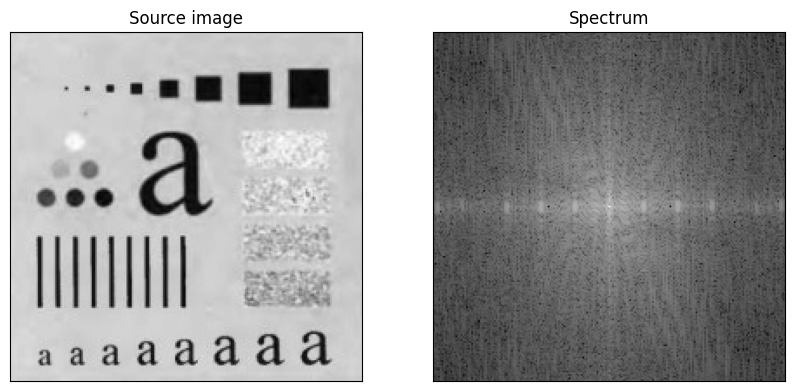

In [182]:
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Source image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(spectrum, cmap='gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

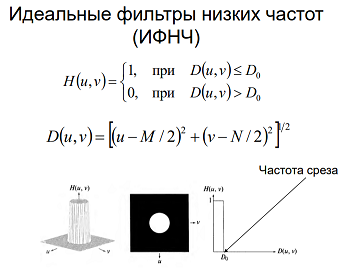 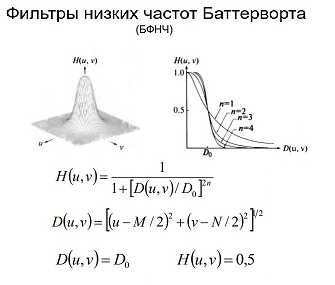 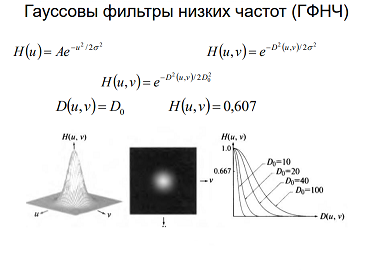

In [164]:
# Smoothing filters

## Ideal filter
D0 = 15
uu, vv = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
D = np.sqrt((uu - image.shape[1] // 2) ** 2 + (vv - image.shape[0] // 2) ** 2)

ideal_mask = (D <= D0) # mask formula

ideal_fourier_shift = fourier_shift * ideal_mask # Applying mask

ideal_fourier_transform = np.fft.ifftshift(ideal_fourier_shift) # inverse center shift
ideal_image = np.abs(np.fft.ifft2(ideal_fourier_transform)) # inverse fourier transform

# Create butterworth filter
D0 = 15
n = 2
uu, vv = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
D = np.sqrt((uu - image.shape[1] // 2) ** 2 + (vv - image.shape[0] // 2) ** 2)

butterworth_mask = 1 / (1 + (D / D0)**(2 * n)) # mask formula

butterworth_fourier_shift = fourier_shift * butterworth_mask# Apply mask

butterworth_inverse_shift = np.fft.ifftshift(butterworth_fourier_shift) # Inverse center shift
butterworth_image = np.abs(np.fft.ifft2(butterworth_inverse_shift)) # Inverse Fourier transform

# Create gaussian filter
sigma = 15
uu, vv = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
D = np.sqrt((uu - image.shape[1] // 2) ** 2 + (vv - image.shape[0] // 2) ** 2)

gaussian_mask = np.exp(-D**2 / (2 * sigma**2)) # mask formula

gaussian_fourier_shift = fourier_shift * gaussian_mask # Applying mask

gaussian_fourier_transform = np.fft.ifftshift(gaussian_fourier_shift) # Back from complex numbers
gaussian_image = np.abs(np.fft.ifft2(gaussian_fourier_transform)) # inverse fourier transform

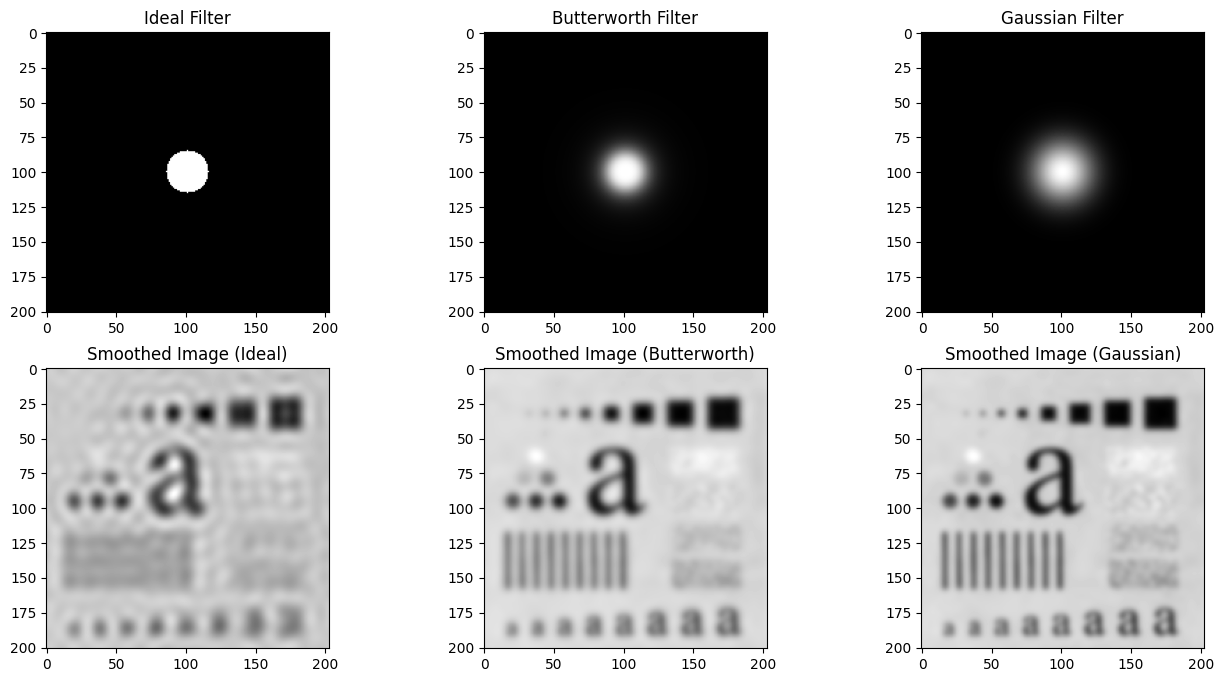

In [165]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1), plt.imshow(ideal_mask,'gray')
plt.title('Ideal Filter')
plt.subplot(2, 3, 4), plt.imshow(ideal_image, 'gray')
plt.title('Smoothed Image (Ideal)')

plt.subplot(2, 3, 2), plt.imshow(butterworth_mask, cmap='gray')
plt.title('Butterworth Filter')
plt.subplot(2, 3, 5), plt.imshow(butterworth_image,'gray')
plt.title('Smoothed Image (Butterworth)')

plt.subplot(2, 3, 3), plt.imshow(gaussian_mask,'gray')
plt.title('Gaussian Filter')
plt.subplot(2, 3, 6), plt.imshow(gaussian_image, 'gray')
plt.title('Smoothed Image (Gaussian)')
plt.show()

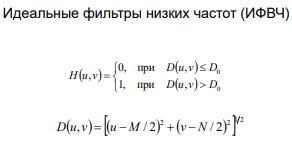 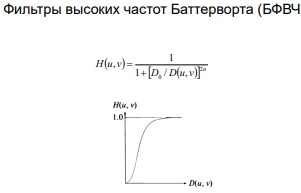 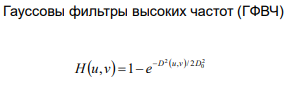

In [179]:
# Sharpening filters

## Ideal filter
D0 = 15
uu, vv = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
D = np.sqrt((uu - image.shape[1] // 2) ** 2 + (vv - image.shape[0] // 2) ** 2)

ideal_mask = 1 - (D <= D0) # mask formula

ideal_fourier_shift = fourier_shift * ideal_mask # Applying mask

ideal_fourier_transform = np.fft.ifftshift(ideal_fourier_shift) # inverse center shift
ideal_image = np.abs(np.fft.ifft2(ideal_fourier_transform)) # inverse fourier transform

# Create butterworth filter
D0 = 15
n = 2
uu, vv = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
D = np.sqrt((uu - image.shape[1] // 2) ** 2 + (vv - image.shape[0] // 2) ** 2)

butterworth_mask = 1 - (1 / (1 + (D / D0)**(2 * n))) # mask formula

butterworth_fourier_shift = fourier_shift * butterworth_mask# Apply mask

butterworth_inverse_shift = np.fft.ifftshift(butterworth_fourier_shift) # Inverse center shift
butterworth_image = np.abs(np.fft.ifft2(butterworth_inverse_shift)) # Inverse Fourier transform

# Create gaussian filter
sigma = 15
uu, vv = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
D = np.sqrt((uu - image.shape[1] // 2) ** 2 + (vv - image.shape[0] // 2) ** 2)

gaussian_mask = 1 - (np.exp(-D**2 / (2 * sigma**2))) # mask formula

gaussian_fourier_shift = fourier_shift * gaussian_mask # Applying mask

gaussian_fourier_transform = np.fft.ifftshift(gaussian_fourier_shift) # Back from complex numbers
gaussian_image = np.abs(np.fft.ifft2(gaussian_fourier_transform)) # inverse fourier transform

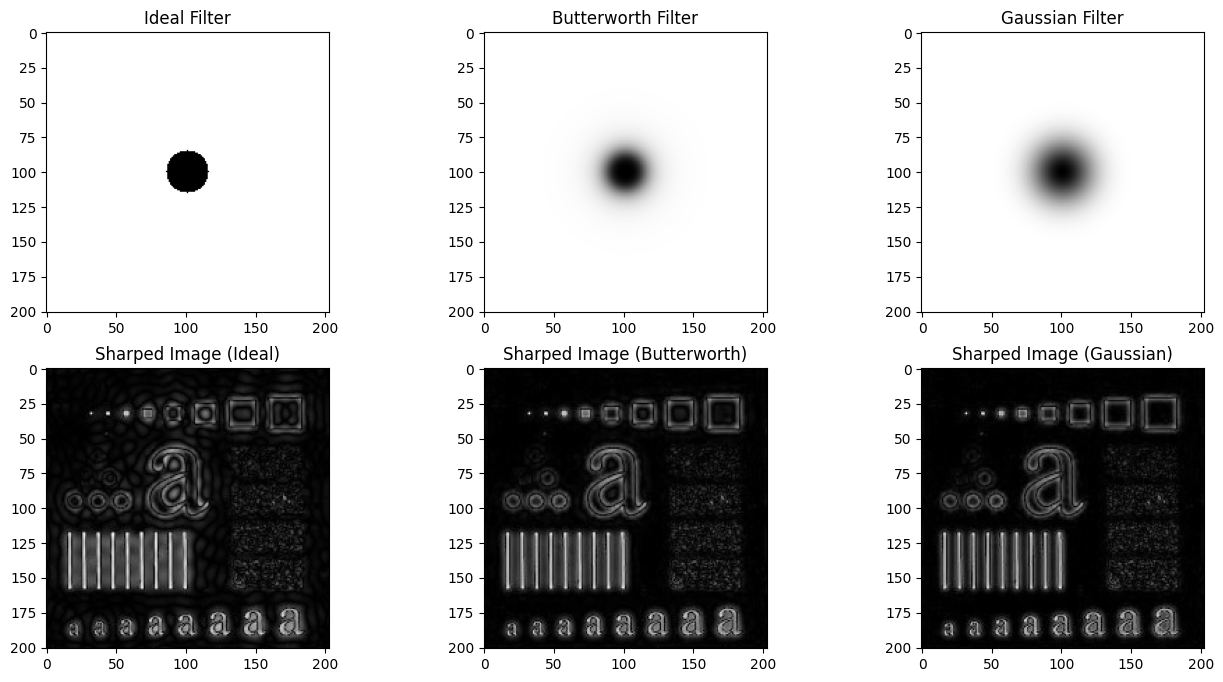

In [180]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1), plt.imshow(ideal_mask,'gray')
plt.title('Ideal Filter')
plt.subplot(2, 3, 4), plt.imshow(ideal_image, 'gray')
plt.title('Sharped Image (Ideal)')

plt.subplot(2, 3, 2), plt.imshow(butterworth_mask, cmap='gray')
plt.title('Butterworth Filter')
plt.subplot(2, 3, 5), plt.imshow(butterworth_image,'gray')
plt.title('Sharped Image (Butterworth)')

plt.subplot(2, 3, 3), plt.imshow(gaussian_mask,'gray')
plt.title('Gaussian Filter')
plt.subplot(2, 3, 6), plt.imshow(gaussian_image, 'gray')
plt.title('Sharped Image (Gaussian)')
plt.show()